# Time Series Forecasting of Household Energy Use

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import norm
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_validate
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset , DataLoader
import matplotlib.pyplot as plt
! pip install -U kaleido
! pip install pmdarima
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from pmdarima.arima import auto_arima
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Set the random seed
import torch
torch.manual_seed(0)
import random
random.seed(0)
import numpy as np
np.random.seed(0)

### 1. Read the dataset

In [3]:
df = pd.read_csv('energydata_complete.csv', index_col='date', parse_dates=True)
freq = pd.infer_freq(df.index)
df = df.asfreq(freq)
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


### Resampling the data into hourly data

It is more convenient to work with hourly data instead of 10-minute data, especially the data set is large. Hourly data can give a better overview of trends and patterns, making it easier to analyze.

In [4]:
df_uni = df['Appliances'].to_frame()
df_uni['hour'] = df_uni.index.hour
df_hour = df_uni.resample('H').mean().reset_index()
df_hour = df_hour.drop('hour', axis=1)
df_hour.set_index('date', inplace=True)
df_hour

,Appliances
date,
2016-01-11 17:00:00,55.000000
2016-01-11 18:00:00,176.666667
2016-01-11 19:00:00,173.333333
2016-01-11 20:00:00,125.000000
2016-01-11 21:00:00,103.333333
...,...
2016-05-27 14:00:00,101.666667
2016-05-27 15:00:00,76.666667
2016-05-27 16:00:00,135.000000


### 2. Analyse and visualise the data

### 2.1 Visualise the data

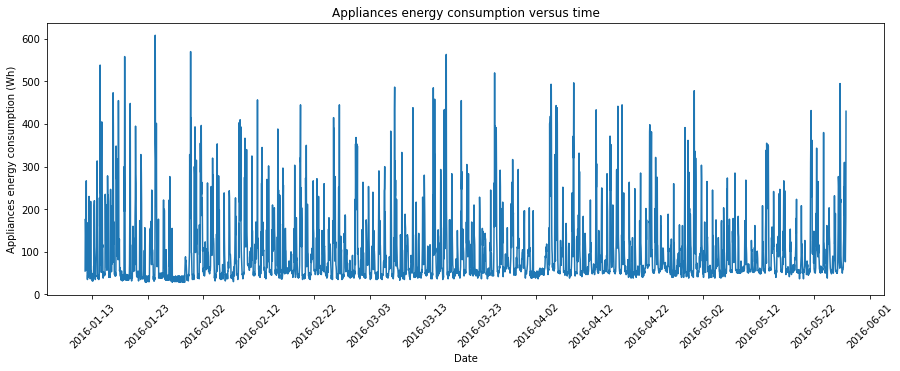

In [5]:
# plot appliances energy consumption versus time
dates = pd.Series(df_hour.index)
Appliances = df_hour['Appliances']

fig, ax = plt.subplots(figsize=(15,5))  # set the figure size
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xticks(rotation=45)
plt.plot(dates, Appliances)
plt.xlabel('Date')
plt.ylabel('Appliances energy consumption (Wh)')
plt.title('Appliances energy consumption versus time')
plt.show()


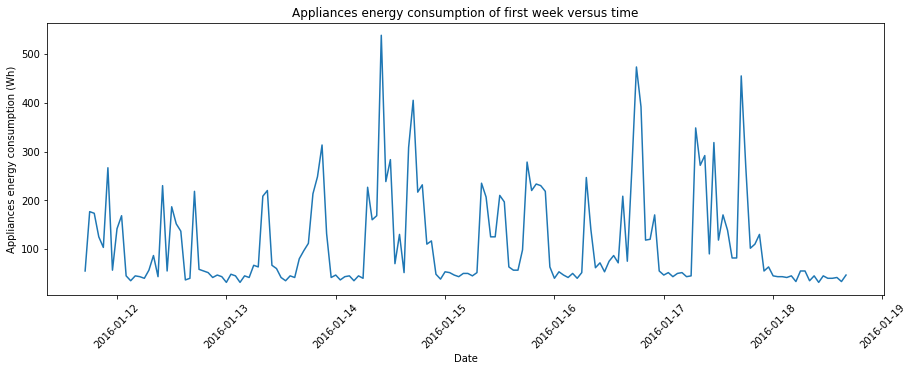

In [6]:
# plot appliances energy consumption versus time
dates_week1 = dates[:168]
Appliances_week1 = Appliances[:168]

fig, ax = plt.subplots(figsize=(15,5))  # set the figure size
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)
plt.plot(dates_week1, Appliances_week1)
plt.xlabel('Date')
plt.ylabel('Appliances energy consumption (Wh)')
plt.title('Appliances energy consumption of first week versus time')
plt.show()

### 2.2 Data pre-processing (Imputation)

In [7]:
#checking shape of dataset
df_hour.shape

(3290, 1)

In [8]:
#checking info of dataset
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3290 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Appliances  3290 non-null   float64
dtypes: float64(1)
memory usage: 51.4 KB


In [9]:
#checking for null values
df_hour.isnull().sum()

Appliances    0
dtype: int64

The dataset does not contain any null value. Therefore, no imputation of missing value is required.

### 2. Analyse and visualise the data

### Trend, seasonal and residual component

Firstly, we examine the trend, seasonal and residual components of the Appliances energy consumption data. We perform the additive seasonal decomposition to look for the characteristics of the data. The reason for choosing additive model instead of multiplicative model is because the seasonal variation of energy consumption is relatively constant over time. The period is set at 24 becasue our data is sampled every hour. There are 24 hours a day. Although the trend component graph shows no obvious trend, a clear seasonal component can be observed in seasonal component graph. There is also a graph giving us a closer look to the seasonal component of first 200 data. It shows that the seasonal pattern is repeated daily. The residual component seems to be stationary by eye, but we will use autocorrelation function (ACF), partial autocorrelation function (PACF), and Augmented Dickey-Fuller (ADF) test to further investigate  the stationarity of the residuals. 

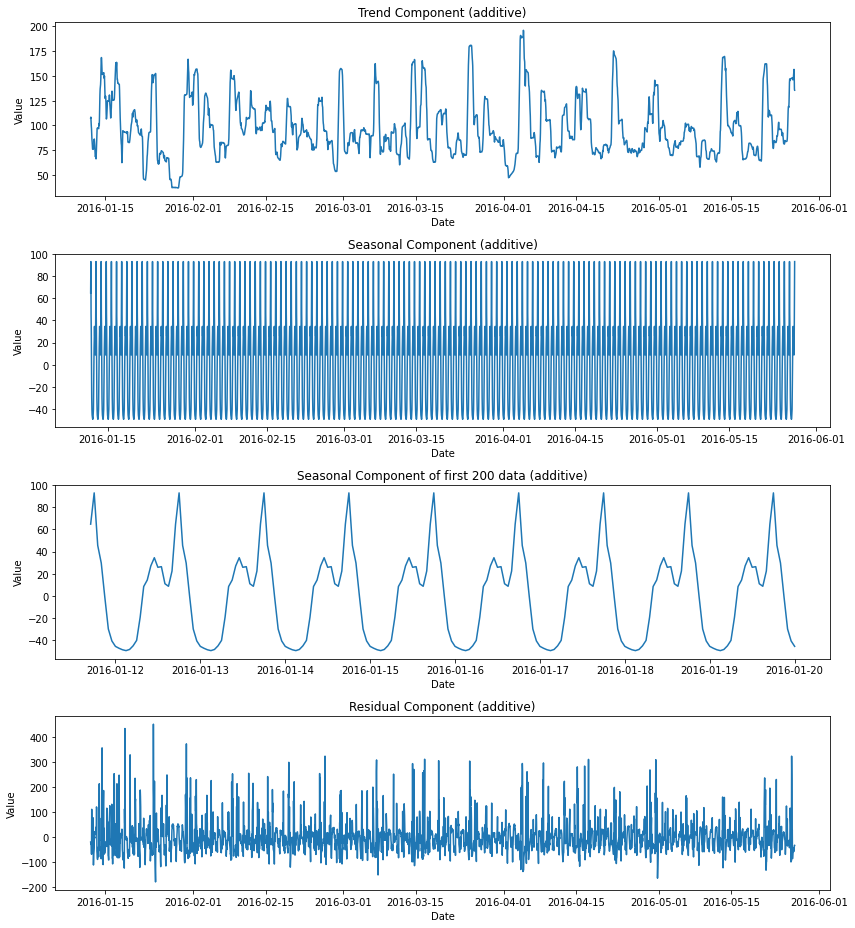

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition using the 'additive' method
decomposition = seasonal_decompose(df_hour['Appliances'], model='additive', period=24)

# Extract the trend, seasonal, and residual components from the decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
seasonal_200 = decomposition.seasonal[:200]
residual = decomposition.resid

# Plot the original time series and the decomposed components
plt.figure(figsize=(12,13))
plt.subplot(411)
plt.plot(trend)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend Component (additive)')
plt.subplot(412)
plt.plot(seasonal)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Seasonal Component (additive)')
plt.subplot(413)
plt.plot(seasonal_200)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Seasonal Component of first 200 data (additive)')
plt.subplot(414)
plt.plot(residual)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Residual Component (additive)')
plt.tight_layout()
plt.show()


### Autocorrelation (ACF)

Autocorrelation (ACF) is a measure of the correlation between a time series and its past values. It helps to identify patterns and trends in the data, such as seasonality or trends. As shown by the ACF of the original data, the autocorrelations remain positive at the first 40 lags. It suggests that the data may have long-term dependencies that cannot be easily explained by a simple trend. In this cases, it may be necessary to apply differencing to remove the long-term dependencies and make the series stationary. This can improve the accuracy of forecasting models that rely on stationary data such as ARIMA. Then, we perform 1st order and 2nd order differencing and examine ACF again. From the ACF graph of 1st order differencing, it shows a strong positive correlation at lag 1, then alternate between positive and negative values and decay rapidly to zero. This may suggest that the time series is over-differenced. From the ACF graph of 2nd order differencing, the lag going into the high negative zone very faster. It is obvious that the time series is over-differenced. As a result, a proper differencing order may be 0 or 1. It requires further investigation such as PACF and ADF.


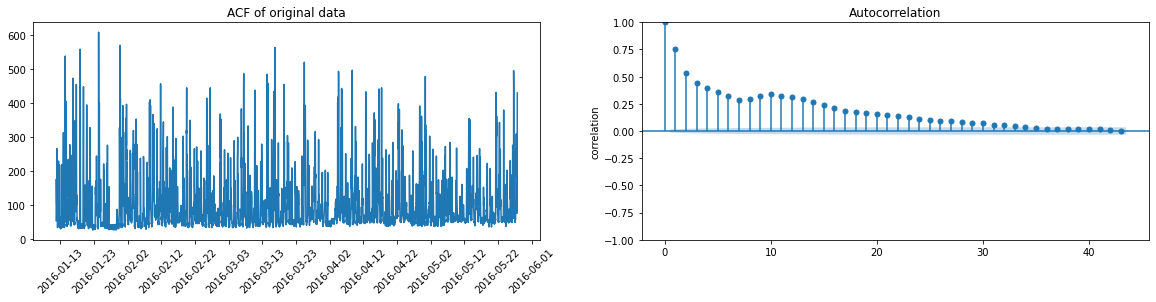

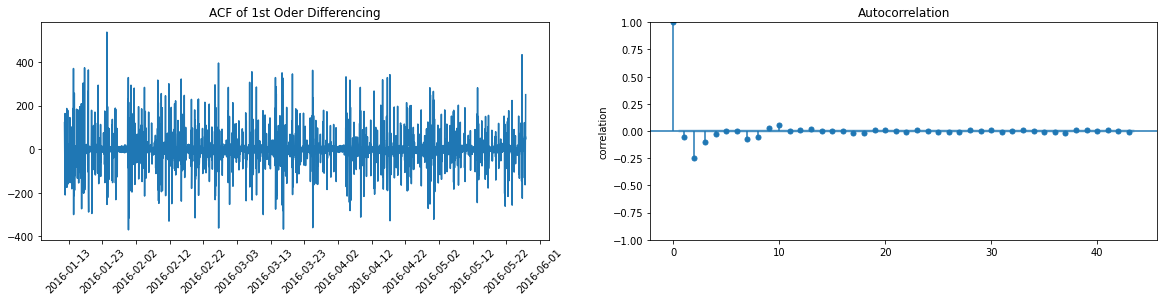

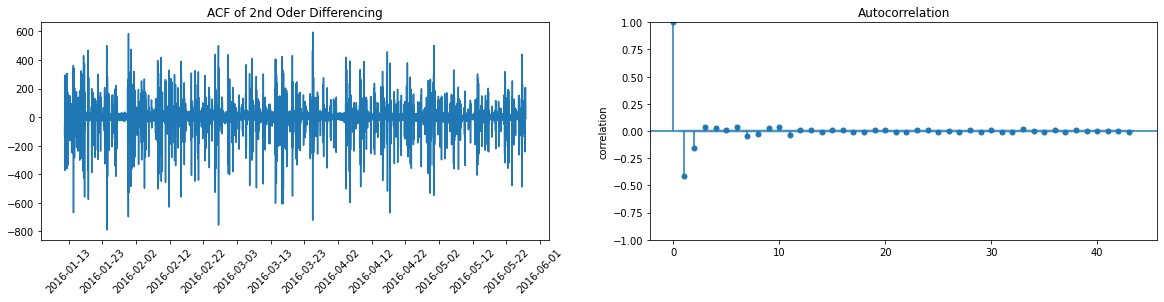

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

f = plt.figure(figsize=(20, 4))
ax1 = f.add_subplot(121)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xticks(rotation=45)
ax1.set_title('ACF of original data')
ax1.plot(df_hour['Appliances'])

ax2 = f.add_subplot(122)
plot_acf(df['Appliances'], ax=ax2)
ax2.set_ylabel('correlation')
plt.show()


f = plt.figure(figsize=(20, 4))
ax1 = f.add_subplot(121)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xticks(rotation=45)
ax1.set_title('ACF of 1st Oder Differencing')
ax1.plot(df_hour['Appliances'].diff().dropna())

ax2 = f.add_subplot(122)
plot_acf(df['Appliances'].diff().dropna(), ax=ax2)
ax2.set_ylabel('correlation')
plt.show()


f = plt.figure(figsize=(20, 4))
ax1 = f.add_subplot(121)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xticks(rotation=45)
ax1.set_title('ACF of 2nd Oder Differencing')
ax1.plot(df_hour['Appliances'].diff().diff().dropna())

ax2 = f.add_subplot(122)
plot_acf(df['Appliances'].diff().diff().dropna(), ax=ax2)
ax2.set_ylabel('correlation')
plt.show()


### Partial Autocorrelation (PACF) 

Partial Autocorrelation is similar to ACF, it also measures the correlation between a time series and its lagged values but after accounting for the influence of all the intervening lagged values. From the PACF graph of the original data, the first 2 lags shows a strong corelation, then it alternates between positive and negative values. It suggests that a differencing may or may not reuqired. Looking at the PACF graph of 1st and 2nd order differencing, the lag going into the negative zone very faster. It is obvious that the time series is over-differenced. As a result, no differencing is requried for the data based on PACF.  

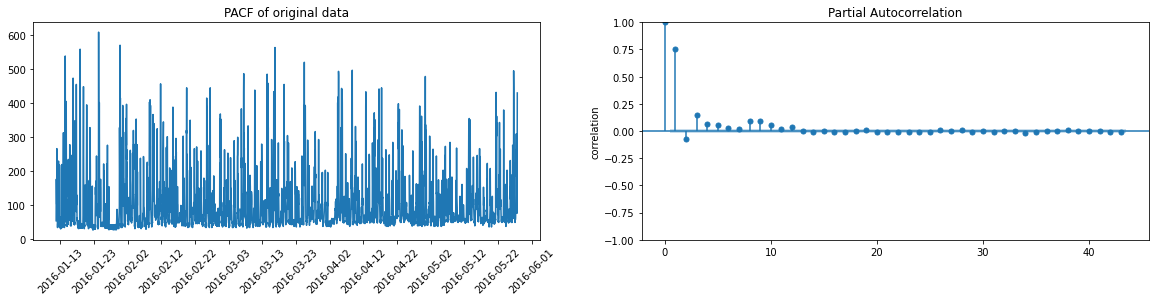

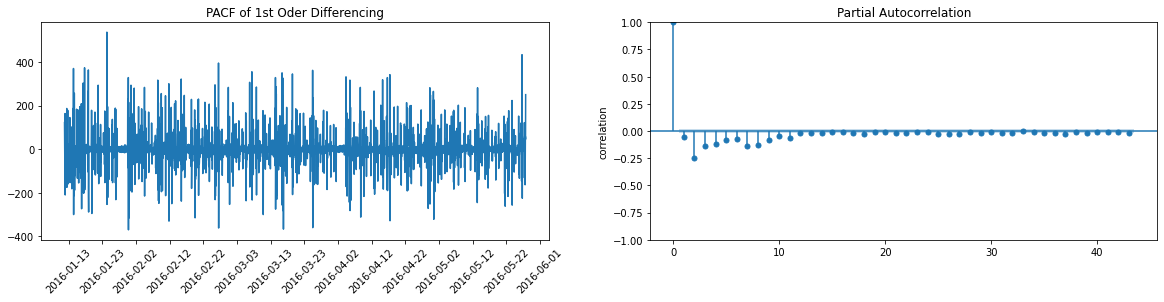

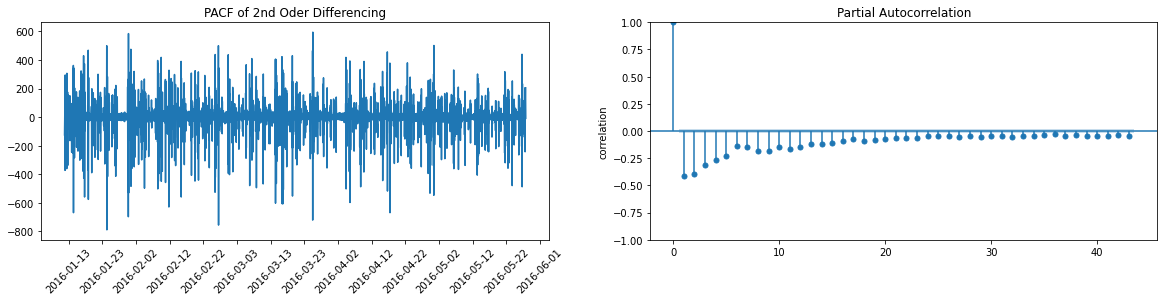

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

f = plt.figure(figsize=(20, 4))
ax1 = f.add_subplot(121)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xticks(rotation=45)
ax1.set_title('PACF of original data')
ax1.plot(df_hour['Appliances'])

ax2 = f.add_subplot(122)
plot_pacf(df['Appliances'], ax=ax2)
ax2.set_ylabel('correlation')
plt.show()


f = plt.figure(figsize=(20, 4))
ax1 = f.add_subplot(121)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xticks(rotation=45)
ax1.set_title('PACF of 1st Oder Differencing')
ax1.plot(df_hour['Appliances'].diff().dropna())

ax2 = f.add_subplot(122)
plot_pacf(df['Appliances'].diff().dropna(), ax=ax2)
ax2.set_ylabel('correlation')
plt.show()


f = plt.figure(figsize=(20, 4))
ax1 = f.add_subplot(121)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xticks(rotation=45)
ax1.set_title('PACF of 2nd Oder Differencing')
ax1.plot(df_hour['Appliances'].diff().diff().dropna())

ax2 = f.add_subplot(122)
plot_pacf(df['Appliances'].diff().diff().dropna(), ax=ax2)
ax2.set_ylabel('correlation')
plt.show()


###  Augmented Dickey-Fuller test (ADF)

The Augmented Dickey-Fuller test is used to test for the presence of a unit root in a time series. When a time series has a unit root, it means that its mean and variance change over time and it is not stationary. One of the useful  indicator from ADF is p-value. P-value is a measure of the strength of evidence against the null hypothesis that a time series has a unit root, indicating that it is non-stationary. If p-value is less than 0.05, it concludes that the time series is stationary. If p-value is greater than 0.05, it concludes that the time series is non-stationary. From the ADF test, the p-values for origianl, 1st order, and 2nd order differencing are almost 0. It means differencing is not requried for the data. 

In [13]:
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(df_hour['Appliances'].dropna())
print('origianl p-value: ', result1[1])

result2 = adfuller(df_hour['Appliances'].diff().dropna())
print('1st oder differencing p-value: ', result2[1])

result3 = adfuller(df_hour['Appliances'].diff().diff().dropna())
print('2nd oder differencing p-value: ', result3[1])

origianl p-value:  8.833753129594426e-15
1st oder differencing p-value:  9.437199196923424e-30
2nd oder differencing p-value:  0.0


### Analysis findings and choice of models

From the trend, seasonal and residual decomposition, we found that the data has a seasonal pattern which repeats daily. From the ACF and PACF graphs, we found that the data is corelated with its past value and has long-term dependencies. Therefore, the suitable forecasting models would be Auto Regressive Integrated Moving Average (ARIMA) and Long short-term memory networks (LSTM).


The ARIMA model is made up of three parts: autoregression (AR), differencing (I), and moving average (MA). The AR part represents the correlation between past and present values in the time series, the I part represents the differencing of the series to make it stationary, and the MA part represents the correlation between the error term and past error terms in the series. Therefore ARIMA can capture the seasonal patterns and long-term dependencies of the data for forecasting.


The LSTM model is a type of recurrent neural network (RNN) for time-series forecasting. It has memory cells and gates which allows it to remember information over longer time periods. The gates control the flow of past information into and out of the memory cells. Thus, LSTM is able to learn the seasonal patterns and long-term dependencies of the data. The input would consist of a window of past values of the time series, and the output would be the next value in the time series. 





### 3. Implement prediction models

### Spliting data and Scaling

In [14]:
df_apppliances = df_hour  

In [15]:
arima_train = df_apppliances.iloc[:int(0.8 * df_hour.shape[0])].dropna()   # The first 80% data is training data
arima_test = df_apppliances.iloc[int(0.8 * df_hour.shape[0]):].dropna()    # The last 20% data is testing data

In [16]:
print(len(arima_train))
print(len(arima_test))

2632
658


### Auto Regressive Integrated Moving Average (ARIMA)

Before we implement the ARIMA, we have to determine the seveal model parameters namely, p,d, and q. Parameter p is the number of lagged (or past) observations to consider for autoregression (AR). Parameter d is the order of differencing of the original data. Parameter q is the the size of the moving average window. Since we decided the distancing (d) is 0 from ACF, PACF and ADF. We do not find the p and q from PACF and ACF. We use Auto-arima to find the optimum p,d,q parameters for ARIMA model.

### Auto-arima for finding p,d,q 

In [17]:
import pmdarima as pm

# find best parameters using auto arima
model = pm.auto_arima(arima_train, seasonal=True)

# print model summary
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2632
Model:               SARIMAX(1, 0, 2)   Log Likelihood              -14799.281
Date:                Sun, 26 Mar 2023   AIC                          29608.561
Time:                        11:37:43   BIC                          29637.939
Sample:                    01-11-2016   HQIC                         29619.199
                         - 04-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.7618      3.929      8.848      0.000      27.062      42.462
ar.L1          0.6461      0.025     25.650      0.000       0.597       0.695
ma.L1         -0.1802      0.027     -6.702      0.0

From the Auto-arima, the best parameters are p = 1, d = 0, q = 2.

### Arima model (Univariate)

RMSE:  83.53915328610483
MAE:  58.30127044646682
MAPE:  72.32109705472172


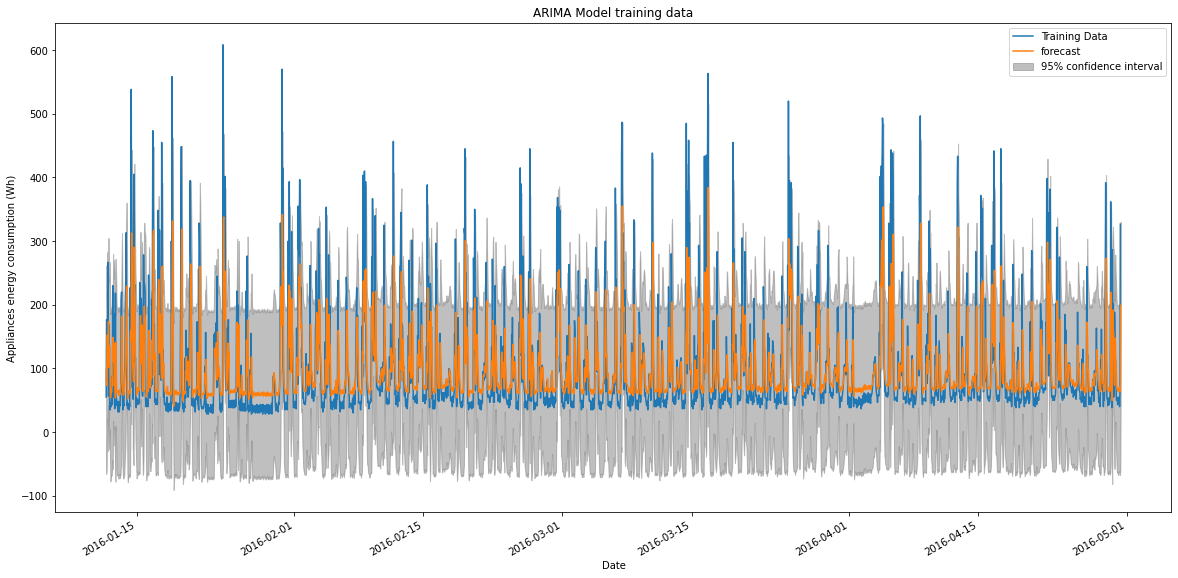

In [42]:
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.graphics.tsaplots import plot_predict

# Initialize lists to store evaluation metrics
arima_train_rmse = []
arima_train_mae = []
arima_train_mape = []

# Training of the ARIMA model
uni_arima = ARIMA(arima_train, order=model.order) 
uni_arima_fit = uni_arima.fit()
forecast = uni_arima_fit.forecast(steps=len(arima_train))

# Calculate the error between the prediction and actual value
print('RMSE: ', np.sqrt(mean_squared_error(arima_train, forecast)))
print('MAE: ', mean_absolute_error(arima_train,forecast))
print('MAPE: ', mean_absolute_percentage_error(arima_train, forecast)*100)

# Store evaluation metrics
arima_train_rmse.append(np.sqrt(mean_squared_error(arima_train, forecast)))
arima_train_mae.append(mean_absolute_error(arima_train,forecast))
arima_train_mape.append(mean_absolute_percentage_error(arima_train, forecast)*100)

# Plot the training data and predicted values
training_data = arima_train
fig, ax = plt.subplots(figsize=(20, 10))
training_data_plot = ax.plot(training_data, label='Training Data')
predicted_values = plot_predict(uni_arima_fit, 0, 2632, ax=ax, alpha=0.05)
ax.set_xlabel('Date')
ax.set_ylabel('Appliances energy consumption (Wh)')
plt.title('ARIMA Model training data')
plt.show()


### LSTM

The LSTM model has the following parameters:

Sequence length (window size): 10 

Hidden state size: 128 

learning rate = 1e-3

Optimizer: Adam optimizer

Loss function: Mean Square Error loss

Training batch size: 20


In [19]:
# Display only the Daily Close price
df1 = df_hour['Appliances'].astype(float)
df1

date
2016-01-11 17:00:00     55.000000
2016-01-11 18:00:00    176.666667
2016-01-11 19:00:00    173.333333
2016-01-11 20:00:00    125.000000
2016-01-11 21:00:00    103.333333
                          ...    
2016-05-27 14:00:00    101.666667
2016-05-27 15:00:00     76.666667
2016-05-27 16:00:00    135.000000
2016-05-27 17:00:00    180.000000
2016-05-27 18:00:00    430.000000
Name: Appliances, Length: 3290, dtype: float64

In [20]:
# normalising the dataset to values bewtween 0 and 1 using MinMaxScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
df1 = scalar.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
# Display the normalised dataset
df1

array([[0.04597701],
       [0.25574713],
       [0.25      ],
       ...,
       [0.18390805],
       [0.26149425],
       [0.69252874]])

In [22]:
# splitting dataset into training and testing data in a ratio of 0.8 and 0.2 respectively
training_size = int(len(df1)*0.8)

test_size = len(df1) - training_size

train_data, test_data = df1[0:training_size,:], df1[training_size:,:]  # the first 2632 hours for training
                                                                       # the next 658 hours for testing
print(len(train_data))
print(len(test_data))

2632
658


In [23]:
print(train_data.shape)
print(test_data.shape)

(2632, 1)
(658, 1)


In [24]:
# Define the EnergyConsumption Class
class EnergyConsumption(Dataset):
    def __init__(self,data,seq_len = 10):  # the sequence length is 10
        self.data = data
        self.data = torch.from_numpy(data).float().view(-1) # change to float and flatten the tensor
        self.seq_len = seq_len
        
    def __len__(self):
        return len(self.data)-self.seq_len-1

    def __getitem__(self, index) :
        return  self.data[index : index + self.seq_len] , self.data[index + self.seq_len]  # Pair up the input data and the label data

In [25]:
# Create the training and testing dataset
train_dataset = EnergyConsumption(train_data) 
test_dataset = EnergyConsumption(test_data) 

batch_size = 20   # The batch size is 20
train_dataloader = DataLoader(train_dataset,batch_size,drop_last=True)  # Drop the last remaining data if smaller than batch size
test_dataloader = DataLoader(test_dataset,batch_size,drop_last=True)    # Drop the last remaining data if smaller than batch size

device = "cuda" if torch.cuda.is_available() else "cpu"

In [26]:
class Lstm_model(nn.Module):
    
    def __init__(self, input_dim , hidden_size , num_layers):
        super(Lstm_model, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_dim
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=input_dim , hidden_size = hidden_size , num_layers= num_layers)  # LSTM layer
        self.fc = nn.Linear(hidden_size,1)

    def forward(self,x,hn,cn):
        out , (hn,cn) = self.lstm(x , (hn,cn))
        final_out = self.fc(out[-1])  # select output of the last time step as fully-connected layer input
        return final_out,hn,cn

    def init(self):   # initialise the hidden state and memory state
        h0 =  torch.zeros(self.num_layers , batch_size , self.hidden_size).to(device)
        c0 =  torch.zeros(self.num_layers , batch_size , self.hidden_size).to(device)
        return h0 , c0


input_dim = 1    # input is the daily close price only
hidden_size = 128   # hidden state size is 128 
num_layers = 2   # 2 stacks of sequence layers

lstm_model = Lstm_model(input_dim , hidden_size , num_layers).to(device)
loss_fn = nn.MSELoss(reduction='mean')  # Loss function is Mean Square Error loss
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=1e-3)   # learning rate = 1e-3, Adam optimizer as default

In [27]:
# Define the training function 
def train(dataloader, model):
    
    loss_list = []

    if model == lstm_model:
        hn , cn = model.init()   # initialise the hidden state and memory state if LSTM model
    
    model.train()
    for batch , item in enumerate(dataloader):  
        x , y = item
        x = x.to(device)
        y = y.to(device)

        if model == lstm_model:   # training for LSTM model
            out , hn , cn = model(x.reshape(10,batch_size,1),hn,cn)   
            loss = loss_fn(out.reshape(batch_size) , y)  
            hn = hn.detach()
            cn = cn.detach()
        
        optimizer.zero_grad()  # Backpropagation and optimization 
        loss.backward()
        optimizer.step()
        
        if batch == len(dataloader)-1:  
            loss = loss.item()
            loss_list.append(loss)  # store the loss in a list for ploting graph
    
    return loss_list

In [28]:
# Define the testing function
def test(dataloader, model):

    if model == lstm_model:
        hn , cn = model.init()   # initialise the hidden state and memory state if LSTM model

    model.eval()
    for batch , item in enumerate(dataloader):
        x , y = item
        x = x.to(device)
        y = y.to(device)
        
        if model == lstm_model:   # prediction for LSTM model
            out , hn , cn = model(x.reshape(10,batch_size,1),hn,cn)

        loss = loss_fn(out.reshape(batch_size) , y)
    
    loss = loss.item()

    return loss

In [44]:
# Define a function to compare prediction with actual value 
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import mean_absolute_percentage_error

def calculate_metrics(data_loader, model):

    # Initialize lists to store evaluation metrics
    lstm_rmse = []
    lstm_mae = []
    lstm_mape = []

    pred_arr = []
    y_arr = []
    with torch.no_grad():

        if model == lstm_model:
            hn , cn = model.init()  

        for batch , item in enumerate(data_loader):
            x , y = item
            x , y = x.to(device) , y.to(device)
            x = x.view(10,20,1)

            if model == lstm_model:
                pred = model(x,hn,cn)[0]

            pred = scalar.inverse_transform(pred.detach().cpu().numpy()).reshape(-1)  # tranform from normalise back to original numbers
            y = scalar.inverse_transform(y.detach().cpu().numpy().reshape(1,-1)).reshape(-1)  # tranform from normalise back to original numbers
            pred_arr = pred_arr + list(pred)
            y_arr = y_arr + list(y)

    # Define some parameters for ploting graphs
    if data_loader == train_dataloader:
        n, start, end = 'Training data', 10, 2632      # The 10th of training data until the end of training data 
    elif data_loader == test_dataloader:
        n, start, end = 'Testing data', 2642, 3290    # The 10th testing data until the end of testing data

    if model == lstm_model:
        m = '(LSTM model)'
    
    # Calculate the error between the prediction and actual value
    print(f'{m} {n} RMSE: ', np.sqrt(mean_squared_error(y_arr, pred_arr)))
    print(f'{m} {n} MAE: ', mean_absolute_error(y_arr,pred_arr))
    print(f'{m} {n} MAPE: ', mean_absolute_percentage_error(y_arr, pred_arr)*100)

    # Ploting Actual Price and Predicted Price for training and testing data for different models
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Scatter(x=df_hour.index[start:end],y=y_arr, mode='lines', name="Actual value"))
    fig.add_trace(go.Scatter(x=df_hour.index[start:end],y=pred_arr, mode='lines', name="Predicted value"))
    fig.update_layout(height=500, width=1000, title_text=f"Appliances energy consumption versus time - {n} {m}", xaxis_title="Date", yaxis_title="Appliances energy consumption (Wh)",)
    fig.show('svg')

    rmse = np.sqrt(mean_squared_error(y_arr, pred_arr))
    mae = mean_absolute_error(y_arr, pred_arr)
    mape = mean_absolute_percentage_error(y_arr, pred_arr)*100

    # Store evaluation metrics
    lstm_rmse.append(rmse)
    lstm_mae.append(mae)
    lstm_mape.append(mape)

    return lstm_rmse, lstm_mae, lstm_mape



### 4. Train prediction models

### LSTM Training

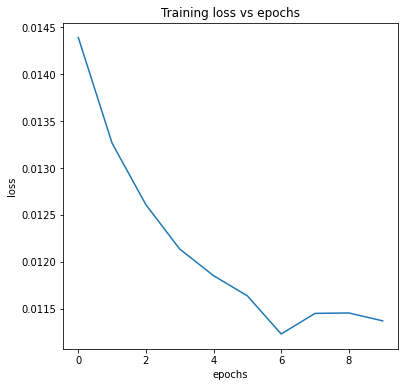

In [30]:
# Training and testing on lstm_model
epochs = 10
train_loss = []

for epoch in range(epochs):
    loss = train(train_dataloader, lstm_model)
    train_loss.extend(loss)

# Plot the training loss
fig, ax = plt.subplots(1,1,figsize=[6,6])
ax.plot([i for i in range(len(train_loss))], train_loss)
ax.set_title('Training loss vs epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
plt.show()


(LSTM model) Training data RMSE:  72.27535
(LSTM model) Training data MAE:  47.952347
(LSTM model) Training data MAPE:  56.748390197753906


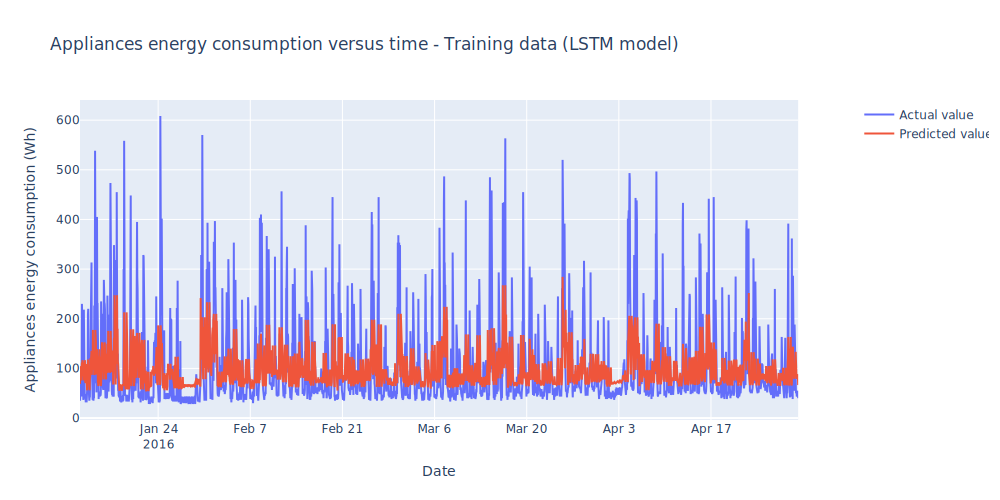

In [45]:
# Compare training data prediction with actual value (LSTM Model)
lstm_train_rmse, lstm_train_mae, lstm_train_mape = calculate_metrics(train_dataloader, lstm_model)

### 5. Test prediction models and show results

### ARIMA (univariate) model testing

RMSE:  55.483100416207954
MAE:  33.971650184282595
MAPE:  33.65207429090312


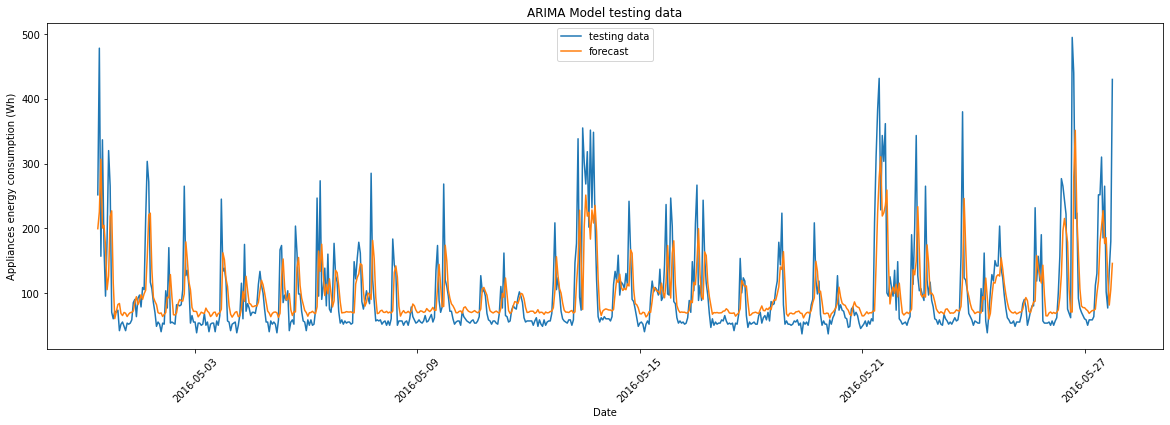

In [47]:
# Testing of the ARIMA model

# Initialize lists to store evaluation metrics
arima_test_rmse = []
arima_test_mae = []
arima_test_mape = []

# testing of arima model
arima_train_new = arima_train
testing_forecast = list()

# moving-forward forecasting
for i in range(len(arima_test)):
    model = ARIMA(arima_train_new, order=model.order) 
    model_fit = model.fit()
    forecast = model_fit.forecast()
    result = forecast[0]
    testing_forecast.append(result)
    arima_train_new = pd.concat([arima_train_new, arima_test.iloc[[i]]], ignore_index=False)

# Calculate the error between the prediction and actual value
rmse = np.sqrt(mean_squared_error(arima_test, testing_forecast))
mae = mean_absolute_error(arima_test, testing_forecast)
mape = mean_absolute_percentage_error(arima_test, testing_forecast)*100

print('RMSE: ', rmse)
print('MAE: ', mae)
print('MAPE: ', mape)

# Store evaluation metrics
arima_test_rmse.append(rmse)
arima_test_mae.append(mae)
arima_test_mape.append(mape)

# Plot the testing data and predicted values
fig = plt.figure(figsize=(20, 6))
plt.plot(arima_test.index, arima_test['Appliances'], label='testing data')
plt.plot(arima_test.index, testing_forecast, label='forecast')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.xlabel('Date')
plt.ylabel('Appliances energy consumption (Wh)')
plt.xticks(rotation=45)
plt.title('ARIMA Model testing data')
plt.legend()
plt.show()


### LSTM testing

(LSTM model) Testing data RMSE:  57.999886
(LSTM model) Testing data MAE:  38.562935
(LSTM model) Testing data MAPE:  43.32916736602783


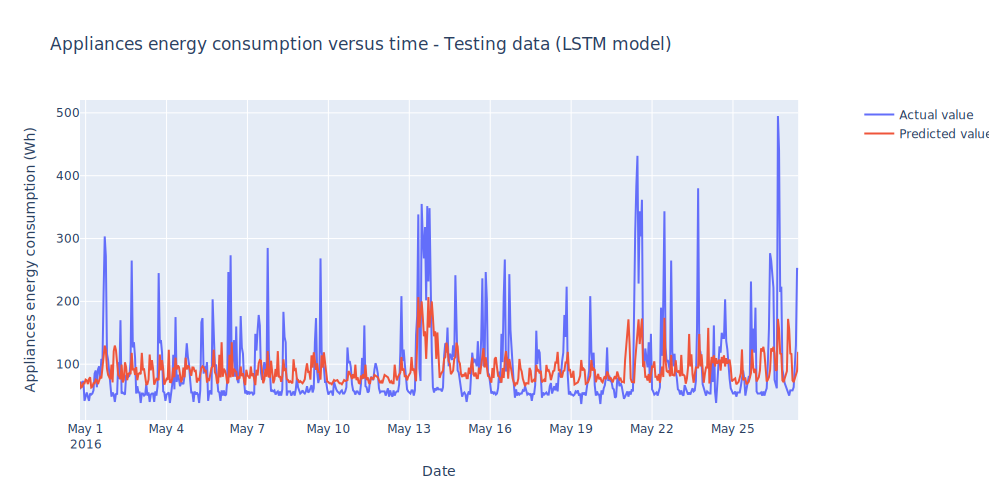

In [46]:
# Compare testing data prediction with actual value (LSTM Model)
lstm_test_rmse, lstm_test_mae, lstm_test_mape = calculate_metrics(test_dataloader, lstm_model)

### Selection of model performance metrics

RMSE is the square root of the average of squared differences between the predicted values and the actual values. It is a measure of the average magnitude of the forecasting error.

MAE is the average of the absolute differences between the predicted values and the actual values. It is a measure of the average magnitude of the forecasting error.

MAPE% is the average of the absolute percentage differences between the predicted values and the actual values. It is a measure of the percentage error and it is useful in measuring the accuracy of the model in terms of relative error.

These metrics were chosen over others because they provide different perspectives on the performance of the model. RMSE and MAE measure the magnitude of the forecasting error, while MAPE% measures the percentage error. 

Note that R2 is not used as metric in time series forecasting as it assumes that the predicted values are independent of each other. However, in time series forecasting, the predicted values are dependent on each other and the previous values in the sequence. This means that R2 score may not fully capture the performance of a time series forecasting model.

### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

Compare the results from all candidate models, choose the best model, justify your choice and discuss the results.

Compare with the results you have obtained in Assignment 1.

In [48]:
# Show the training result of all models
train_result = {'RMSE': [arima_train_rmse[0], lstm_train_rmse[0]],
        'MAE': [arima_train_mae[0], lstm_train_mae[0]],
        'MAPE%': [arima_train_mape[0], lstm_train_mape[0]]}

train_result = pd.DataFrame(train_result, index=['ARIMA', 'LSTM'])

print('    The training result of all models')
print()
train_result

    The training result of all models



,RMSE,MAE,MAPE%
ARIMA,83.539153,58.301270,72.321097
LSTM,72.275352,47.952347,56.748390


In [49]:
# Show the training result of all models
test_result = {'RMSE': [arima_test_rmse[0], lstm_test_rmse[0]],
        'MAE': [arima_test_mae[0], lstm_test_mae[0]],
        'MAPE%': [arima_test_mape[0], lstm_test_mape[0]]}

test_result = pd.DataFrame(test_result, index=['ARIMA', 'LSTM'])

print('   The testing result of all models')
print()
test_result

   The testing result of all models



,RMSE,MAE,MAPE%
ARIMA,55.483100,33.971650,33.652074
LSTM,57.999886,38.562935,43.329167


In [50]:
# Define a function for ploting the bar chart of training and testing result
def result_bar(metric, arima_train, lstm_train, arima_test, lstm_test):
    models = ['ARIMA', 'LSTM']
    train = [arima_train, lstm_train]   # RMSE for training data
    test = [arima_test, lstm_test]    # RMSE for testing data

    r1 = np.arange(len(train))
    r2 = [x + 0.2 for x in r1]

    fig = plt.figure(figsize=(15, 10))
    plt.bar(r1, train, color='b', width=0.2, edgecolor='grey', label=f'Training {metric}')
    plt.bar(r2, test, color='r', width=0.2, edgecolor='grey', label=f'Testing {metric}')

    plt.xticks([r + 0.2/2 for r in range(len(train))], models)
    plt.ylabel(f'{metric}')
    plt.title(f'{metric} for Training and Testing Data for different models')
    plt.legend()
    plt.show()

In [51]:
# Define a function for ploting the bar chart of training and testing result
def result_bar(metric, arima_train, lstm_train, arima_test, lstm_test):
    models = ['ARIMA', 'LSTM']
    train = [arima_train[0], lstm_train[0]]   # RMSE for training data
    test = [arima_test[0], lstm_test[0]]    # RMSE for testing data

    # set the width of the bars
    bar_width = 0.35

    # create the x-axis values for the two lists
    x = np.arange(len(models))

    # create the bar chart
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.bar(x - bar_width/2, train, width=bar_width, label='Training')
    ax.bar(x + bar_width/2, test, width=bar_width, label='Testing')

    # add a legend to the bar chart
    ax.legend()

    # set the title and labels for the x- and y-axes
    ax.set_title(f'{metric} for Training and Testing Data for different models')
    ax.set_xlabel('Models')
    ax.set_ylabel(f'{metric}')

    # set the x-axis ticks and tick labels
    ax.set_xticks(x)
    ax.set_xticklabels(models)

    # display the bar chart
    plt.show()



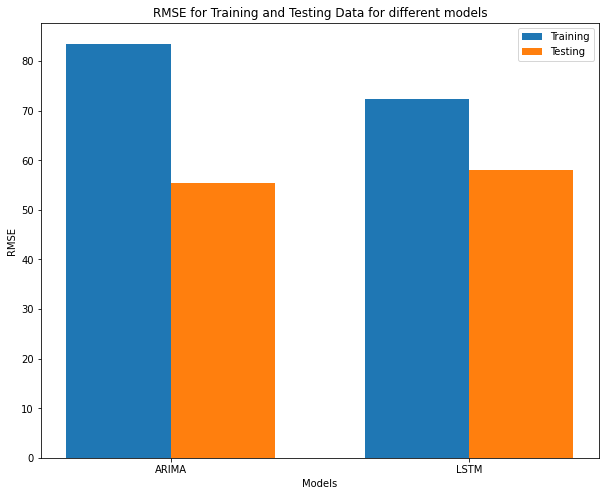

In [52]:
# Plot the RMSE bar chart of training and testing result in different models
result_bar('RMSE', arima_train_rmse, lstm_train_rmse, arima_test_rmse, lstm_test_rmse)

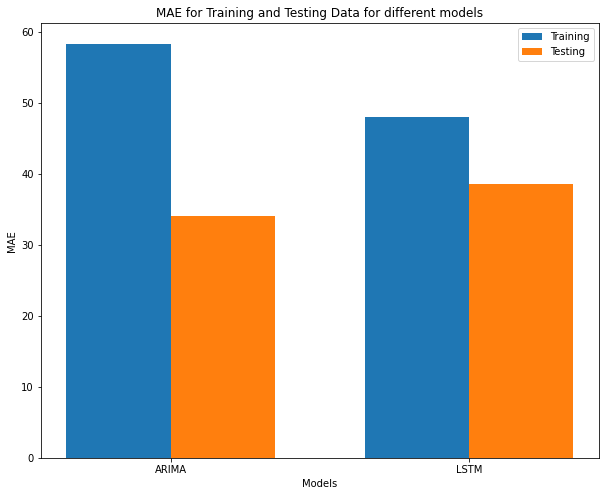

In [53]:
# Plot the MAE bar chart of training and testing result in different models
result_bar('MAE', arima_train_mae, lstm_train_mae, arima_test_mae, lstm_test_mae)

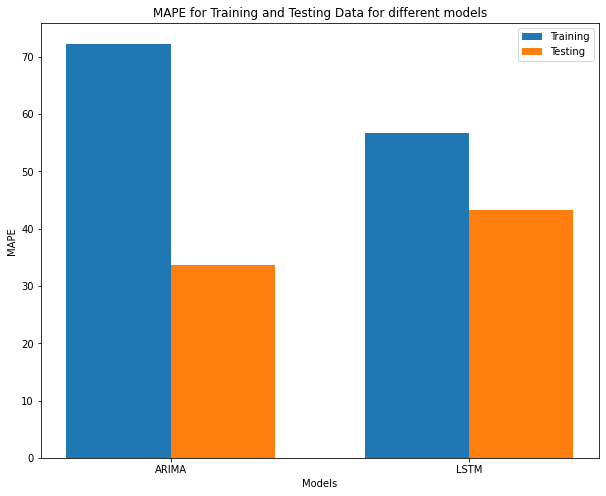

In [54]:
# Plot the MAE bar chart of training and testing result in different models
result_bar('MAPE', arima_train_mape, lstm_train_mape, arima_test_mape, lstm_test_mape)

### Comparison of the results from all candidate models:

The ARIMA model has lower values in RMSE, MAE, MAPE% for testing result compared to LSTM model. Therefore, ARIMA model is the best model which gives the least error. The ARIMA model RMSE, MAE, MAPE% are 55.48, 33.97, 33.65% respectively. ARIMA models tend to perform better when there is limited data available, whereas LSTM models may require a larger amount of data to achieve optimal performance. This is because ARIMA models are relatively simple and do not have as many parameters to estimate as LSTM models.

### 7. References

https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

https://www.justintodata.com/arima-models-in-python-time-series-prediction/

https://www.javatpoint.com/arima-model-in-python

https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

